In [1]:
import pandas as pd
df=pd.read_csv('Zoo.csv')

In [2]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
df.drop('animal name', axis=1, inplace=True)

In [6]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [8]:
df['type'].value_counts()

type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64

In [10]:
X = df.drop('type', axis=1)
y= df['type']

In [12]:
#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
#build the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
y_pred = knn.predict(X_test)

In [29]:
# evaluation 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         2
           5       1.00      0.50      0.67         2
           6       0.83      1.00      0.91         5
           7       1.00      0.67      0.80         3

    accuracy                           0.87        31
   macro avg       0.76      0.73      0.72        31
weighted avg       0.91      0.87      0.87        31



In [17]:
print(confusion_matrix(y_test, y_pred))

[[14  0  0  1  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  1  2]]


In [18]:
#hyperparameter tuning

from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV

In [19]:
# Parameter grid for GridSearchCV
param_grid_gridsearch = {
    'n_neighbors': list(range(1, 9)),  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric
}

# Parameter distribution for RandomizedSearchCV
param_dist_randomsearch = {
    'n_neighbors': list(range(1, 9)),  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric
}


In [22]:
# GridSearchCV
grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_gridsearch,
    scoring='accuracy',
    cv=2,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
print("Best parameters found by GridSearchCV:", grid_search.best_params_)
print("Best accuracy found by GridSearchCV:", grid_search.best_score_)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions=param_dist_randomsearch,
    n_iter=48,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=2,
    n_jobs=-1
)
random_search.fit(X_train, y_train)
print("Best parameters found by RandomizedSearchCV:", random_search.best_params_)
print("Best accuracy found by RandomizedSearchCV:", random_search.best_score_)


Best parameters found by GridSearchCV: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best accuracy found by GridSearchCV: 0.9571428571428571
Best parameters found by RandomizedSearchCV: {'weights': 'uniform', 'n_neighbors': 1, 'metric': 'manhattan'}
Best accuracy found by RandomizedSearchCV: 0.9571428571428571


In [24]:
from sklearn.model_selection import StratifiedKFold

# GridSearchCV with StratifiedKFold
grid_search_stratified = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_gridsearch,
    scoring='accuracy',
    cv=StratifiedKFold(n_splits=2),
    n_jobs=-1
)
grid_search_stratified.fit(X_train, y_train)
print("Best parameters found by GridSearchCV with StratifiedKFold:", grid_search_stratified.best_params_)
print("Best accuracy found by GridSearchCV with StratifiedKFold:", grid_search_stratified.best_score_)


Best parameters found by GridSearchCV with StratifiedKFold: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best accuracy found by GridSearchCV with StratifiedKFold: 0.9571428571428571


In [25]:
import numpy as np

# K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],
                           weights=grid_search.best_params_['weights'],
                           metric=grid_search.best_params_['metric'])
cv_scores = cross_val_score(knn, X, y, cv=kfold)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))


Cross-Validation Accuracy Scores: [0.95238095 0.9        1.         1.         1.        ]
Mean Accuracy: 0.9704761904761906


In [27]:
model1 = KNeighborsClassifier(n_neighbors=1)
model1.fit(X_train,y_train)
y_pred_model1 = model1.predict(X_test)
print(classification_report(y_test,y_pred_model1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         3

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



In [30]:
print(accuracy_score(y_test, y_pred_model1))

1.0


In [31]:
# K-Fold validation
kfold = KFold(n_splits=10, random_state=100, shuffle=True)
results = cross_val_score(model1, X, y, cv=kfold)
print(results.mean()) #Decent value but can be improved

0.9800000000000001


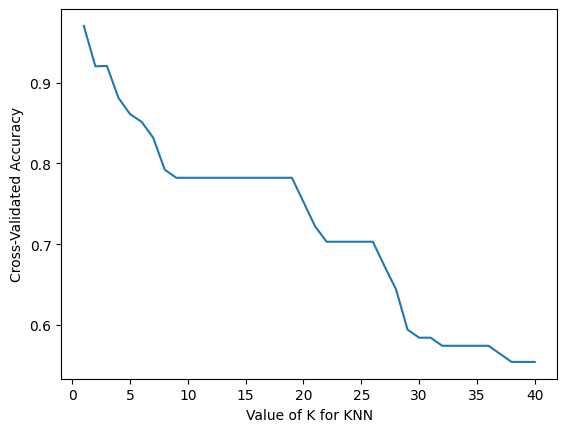

In [34]:
import matplotlib.pyplot as plt
#finding optimal k value
k_scores = []
for k in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=4)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(range(1,41), k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [36]:
model2 = KNeighborsClassifier(n_neighbors=2)
model2.fit(X_train,y_train)
y_pred_model2 = model2.predict(X_test)

In [37]:
confusion_matrix(y_test, y_pred_model2)

array([[15,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  0,  0,  0,  1,  2]], dtype=int64)

In [38]:
print(accuracy_score(y_test, y_pred_model2))

0.967741935483871


In [39]:
# K-Fold validation
kfold = KFold(n_splits=10, random_state=100, shuffle=True)
results = cross_val_score(model2, X, y, cv=kfold)
print(results.mean()) #Decent value but can be improved

0.9400000000000001


In [40]:
# conclusion

#Best parameters found by GridSearchCV: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
#Best accuracy found by GridSearchCV: 0.9571428571428571
#Best parameters found by RandomizedSearchCV: {'weights': 'uniform', 'n_neighbors': 1, 'metric': 'manhattan'}
#Best accuracy found by RandomizedSearchCV: 0.9571428571428571